# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 3/12/2025  
**Puntaje máximo:** 50 puntos

**Alumno(s):** Natialia Campiglia - Maria Jose Carbajal

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **¿Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- $A$ es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- $B$ es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- $|A \cap B|$ es la intersección de $A$ y $B$, es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.75** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Análisis del Dataset (5 puntos):**
   - Exploración y visualización del dataset para comprender su estructura y características.
   - Justificación de las decisiones tomadas en la preprocesamiento de datos, como normalización, aumento de datos (data augmentation), y partición del dataset en conjuntos de entrenamiento, validación y prueba.

2. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

3. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.
   - Puede utilizarse experimentación con hiperparámetros con Weights & Biases (W&B) para optimizar el rendimiento del modelo. Este punto no es obligatorio, pero se valorará positivamente si se justifica su uso y se presentan resultados claros.

4. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

5. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.75** para esta métrica.

   Notas: 
   - **Cualquier decisión debe ser justificada en el notebook.**
   - El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)
- [Convolución Transpuesta](https://d2l.ai/chapter_computer-vision/transposed-conv.html)

### **Competencia Kaggle**

[Link a la competencia Kaggle](https://www.kaggle.com/competitions/tdl-obligatorio-2025)

---

# Integrantes del grupo

Natalia Campiglia - 349251

Maria Jose Carbajal - 241319

# Imports e inicializaciones

In [87]:
!pip install kaggle

In [88]:
import os, json, random
import hashlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from collections import Counter
from PIL import Image
from pathlib import Path

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
from torchinfo import summary
from torchvision import transforms
import torchvision.transforms.v2 as T
from torch.utils.data import random_split, DataLoader, Dataset, Subset
import torch.optim as optim
import torch.nn.functional as F

from utils import (
    train,
    evaluate,
    model_classification_report,
    plot_training,
    match_output_dim,
    plot_confusion_matrix,
    print_metrics_report
)

### Reload imports sin necesidad de restart la notebook

In [89]:
import importlib
import sys
if 'utils' in sys.modules:
    importlib.reload(sys.modules['utils'])

In [90]:
# Fijamos la semilla para que los resultados sean reproducibles
SEED = 23

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

IMG_FOLDER = "data/train/images"
MASK_FOLDER = "data/train/masks"

In [91]:
import sys

# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS
elif torch.xpu.is_available():
    DEVICE = "xpu"  # si no hay GPU, pero hay XPU, usamos XPU

print(f"Usando {DEVICE}")

NUM_WORKERS = 0 # Win y MacOS pueden tener problemas con múltiples workers
if sys.platform == 'linux':
    NUM_WORKERS = 4  # numero de workers para cargar los datos (depende de cada caso)

print(f"Usando {NUM_WORKERS}")

Usando mps
Usando 0


## Constantes

In [92]:
BATCH_SIZE = 1  # tamaño del batch
IMG_SIZE = 572
NUM_CLASES = 2  # persona/no persona

# Dataset

In [93]:
with open("config/kaggle.json") as f:
    creds = json.load(f)

os.environ["KAGGLE_USERNAME"] = creds["username"]
os.environ["KAGGLE_KEY"] = creds["key"]

In [94]:
!kaggle competitions download -c tdl-obligatorio-2025

tdl-obligatorio-2025.zip: Skipping, found more recently modified local copy (use --force to force download)


In [95]:
!unzip -o -qq tdl-obligatorio-2025.zip -d data/

# Exploración de datos

## Ver selección random de imágenes y sus máscaras

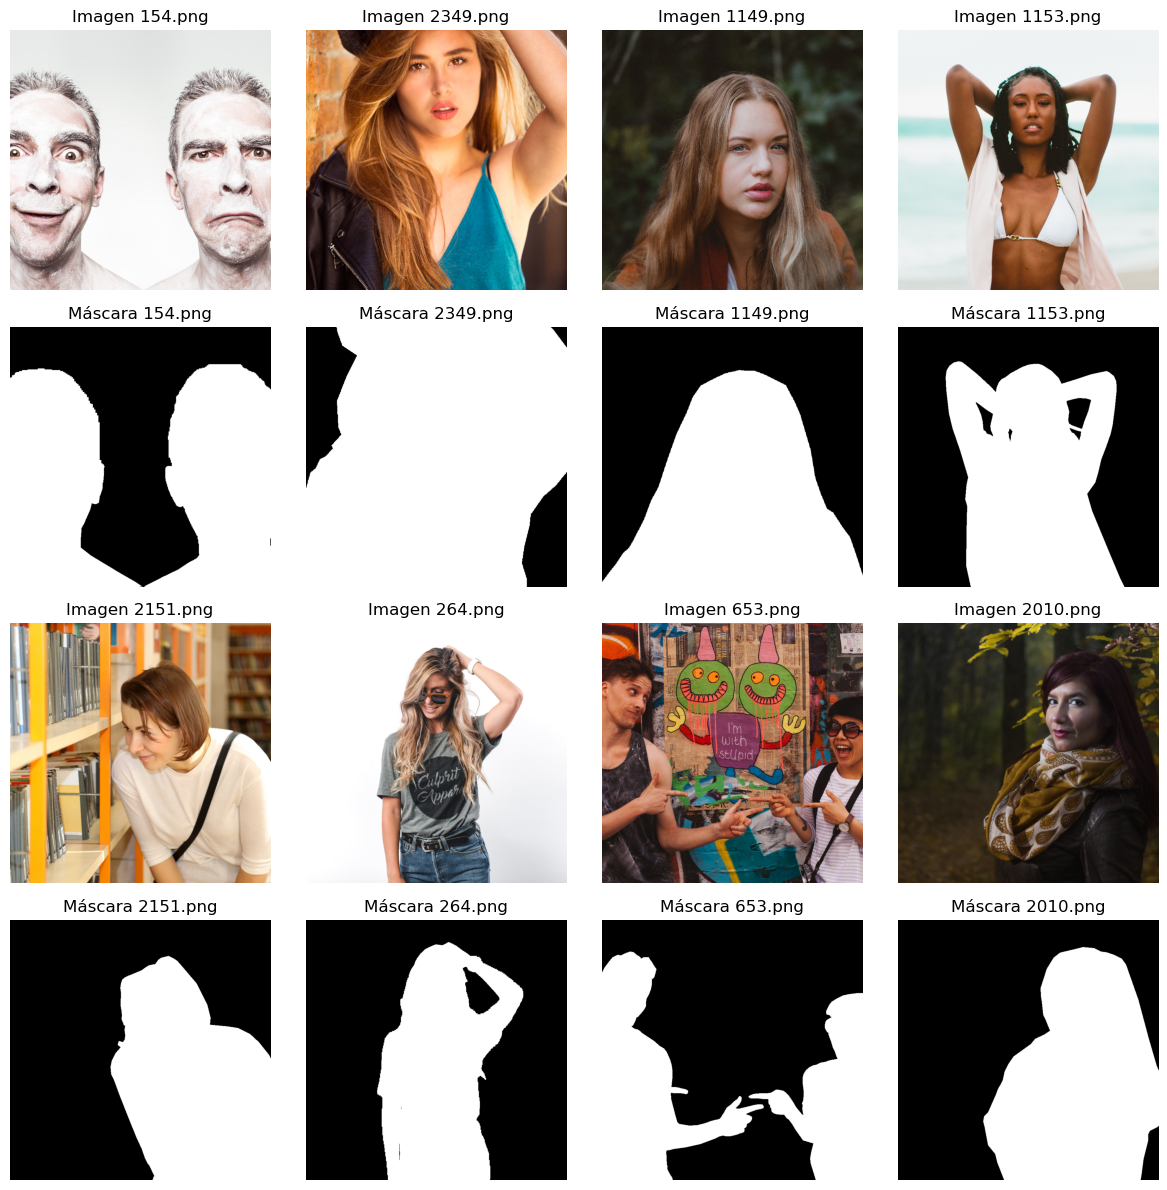

In [96]:
files = random.sample(os.listdir(IMG_FOLDER), 8)  # 8 imágenes → 4 filas de pares

plt.figure(figsize=(12, 12))
for i, f in enumerate(files):
    img = Image.open(os.path.join(IMG_FOLDER, f))
    mask_path = os.path.join(MASK_FOLDER, f)
    mask = np.array(Image.open(mask_path))
    if mask.ndim == 3:
        mask = mask.max(axis=2)

    # Fila 1 y 3: imágenes (i=0..3 e i=4..7)
    if i < 4:
        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Imagen {f}")
        plt.subplot(4, 4, i + 1 + 4)
        plt.imshow(mask, cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        plt.title(f"Máscara {f}")
    else:
        j = i - 4
        plt.subplot(4, 4, j + 1 + 8)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Imagen {f}")
        plt.subplot(4, 4, j + 1 + 12)
        plt.imshow(mask, cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        plt.title(f"Máscara {f}")

plt.tight_layout()
plt.show()


## Ver tamaños de imágenes y máscaras

In [97]:
sizes = set() 
for fname in os.listdir(IMG_FOLDER):
    if 'png' in fname:
        path = os.path.join(IMG_FOLDER, fname)
        with Image.open(path) as img:
            sizes.add(img.size)

print("Tamaño de imagenes:")
for size in sizes:
    print(size)

sizes = set() 
for fname in os.listdir(MASK_FOLDER):
    if 'png' in fname:
        path = os.path.join(MASK_FOLDER, fname)
        with Image.open(path) as img:
            sizes.add(img.size)

print("Tamaño de máscaras:")
for size in sizes:
    print(size)

Tamaño de imagenes:
(800, 800)
Tamaño de máscaras:
(800, 800)


Confirmamos que todas las imágenes y las máscaras tienen el mismo tamaño.

## Buscar duplicados

In [98]:
def md5_file(path: Path):
    with path.open("rb") as f:
        return hashlib.md5(f.read()).hexdigest()

hashes = {}
duplicates = []

folder = Path(IMG_FOLDER)

for path in folder.iterdir():
    if path.is_file():
        h = md5_file(path)
        if h in hashes:
            duplicates.append((str(path), str(hashes[h])))
        else:
            hashes[h] = path

print(f"Encontradas {len(duplicates)} imágenes duplicadas.")

Encontradas 0 imágenes duplicadas.


## Formato y canales

In [99]:
img_dir = Path(IMG_FOLDER)
mask_dir = Path(MASK_FOLDER)

img_channel_counts = set()
mask_channel_counts = set()
mask_unique_values = set()

for img_path, mask_path in zip(sorted(img_dir.iterdir()), sorted(mask_dir.iterdir())):
    if img_path.suffix.lower() not in [".jpg", ".png", ".jpeg"]:
        continue

    # Imagen
    # escala de grises: (hight, width) -> 1 canal
    # RGB: (hight, width, channels) = (height, width, 3) -> 3 canales
    # RGBA: (hight, width, 4)
    try:
        img = np.array(Image.open(img_path))
        img_channels = 1 if img.ndim == 2 else img.shape[2]
        img_channel_counts.add(img_channels)
    
        # Máscara
        mask = np.array(Image.open(mask_path))
        mask_channels = 1 if mask.ndim == 2 else mask.shape[2]
        mask_channel_counts.add(mask_channels)
    
        # Valores únicos de cada máscara (agrega como tupla)
        mask_unique_values.add(tuple(np.unique(mask)))
    except:
        pass

print(f"Canales únicos en imágenes: {img_channel_counts}")
print(f"Canales únicos en máscaras: {mask_channel_counts}")
print(f"Conjuntos de valores únicos en máscaras: {mask_unique_values}")

Canales únicos en imágenes: {1, 3, 4}
Canales únicos en máscaras: {3}
Conjuntos de valores únicos en máscaras: {(np.uint8(0), np.uint8(1)), (np.uint8(1),)}


Las máscaras son todas RGB pero para para las imágenes tenemos en formato blanco y negro, RGB y RGBA.

EL RGBA es como RGB más informacion de transparencia de la imagen; este 4to canal no nos aporta información util para este problema.

Para que las imagenes tengan todas la misma cantidad de canales a la entrada de la red, decidimos pasarlas todas a RGB porque RGBA no aporta más información y pasarlo a blanco y negro nos hace perder colores e intensidad que podrian ayudar al modelo a distinguir la persona del fondo.

## Mean y STD

In [100]:
paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tif','.tiff'))]

# Función de carga forzada a RGB porque algunas estan en RGBA o blanco y negro (L)
def load_rgb(path):
    im = Image.open(path)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    return im

# Media/STD por canal con acumulacion
sum_c = torch.zeros(3, dtype=torch.float64)
sum_sq_c = torch.zeros(3, dtype=torch.float64)
pix_count_c = torch.zeros(3, dtype=torch.float64)

for p in paths:
    try:
        im = load_rgb(p)
        arr = torch.from_numpy(np.asarray(im))  # H x W x 3, uint8
        t = arr.permute(2,0,1).to(torch.float64) / 255.0  # 3 x H x W , [0,1]

        # acumula por canal suma y suma de los cuadrados
        csum = t.view(3, -1).sum(dim=1)
        csum_sq = (t**2).view(3, -1).sum(dim=1)
        n_pix = torch.tensor([t.shape[1]*t.shape[2]]*3, dtype=torch.float64)

        sum_c += csum
        sum_sq_c += csum_sq
        pix_count_c += n_pix
    except Exception as e:
        pass

MEAN_RGB = (sum_c / pix_count_c).to(torch.float32)
STD_RGB = torch.sqrt((sum_sq_c / pix_count_c) - MEAN_RGB.double()**2).to(torch.float32)

print("mean =", MEAN_RGB.tolist(), "std =", STD_RGB.tolist())

/var/folders/s2/p5yczv2s3gv32c5qs90gpnh00000gn/T/ipykernel_13056/1176791895.py:18: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1753839000881/work/torch/csrc/utils/tensor_numpy.cpp:209.)
  arr = torch.from_numpy(np.asarray(im))  # H x W x 3, uint8


mean = [0.5149781107902527, 0.4839880168437958, 0.4597202241420746] std = [0.31370314955711365, 0.3028314411640167, 0.30339837074279785]


**MEAN:**

Los tres canales tienen valores similares por lo que no hay un color que sea mas dominante que otro.

Los valores estan al rededor del 50% lo que indica que las imagenes tienen una exposicion a la luz pareja.

El rojo aparece un poco mas intenso que los demás.

**STD:**

El STD en este caso mide cuánto varía la intensidad de los pixeles en cada canal. 

Por lo que vemos, la variacion para los 3 canales es similar. Un valor de 0.3 nos indica que hay bastante variedad de tonos e intensidades; esto probablemente se deba a que las imagenes tienen zonas claras y oscuras, sombras, piel, ropa, y diversos fondos.

## Histograma de colores en las imágenes

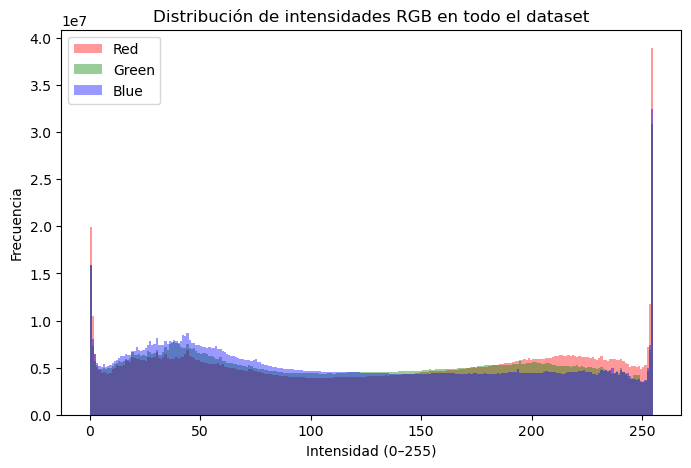

In [101]:
folder = Path(IMG_FOLDER)

# Acumuladores de cada canal
r_vals, g_vals, b_vals = [], [], []

for p in folder.iterdir():
    if p.suffix.lower() not in [".jpg", ".jpeg", ".png"]:
        continue
    img = np.array(Image.open(p).convert("RGB"))
    # achatar para juntar todos los píxeles
    r, g, b = img[..., 0].ravel(), img[..., 1].ravel(), img[..., 2].ravel()
    r_vals.append(r)
    g_vals.append(g)
    b_vals.append(b)

# concatenar todos los valores
r_vals = np.concatenate(r_vals)
g_vals = np.concatenate(g_vals)
b_vals = np.concatenate(b_vals)

# histograma combinado
plt.figure(figsize=(8,5))
plt.hist(r_vals, bins=256, color='r', alpha=0.4, label='Red')
plt.hist(g_vals, bins=256, color='g', alpha=0.4, label='Green')
plt.hist(b_vals, bins=256, color='b', alpha=0.4, label='Blue')
plt.legend()
plt.title("Distribución de intensidades RGB en todo el dataset")
plt.xlabel("Intensidad (0–255)")
plt.ylabel("Frecuencia")
plt.show()


Los picos en 0 y 255 indican que hay muchos píxeles completamente negros o completamente blancos.

Entre los extremos, vemos que la densidad es relativamente plana, lo que indica amplia variación en los colores.

Las curvas roja, verde y azul son muy similares por lo que vemos que los colores están bastante balanceados en las imagenes del dataset.

## Analizar qué porcentaje de la imagen es ocupado por la persona

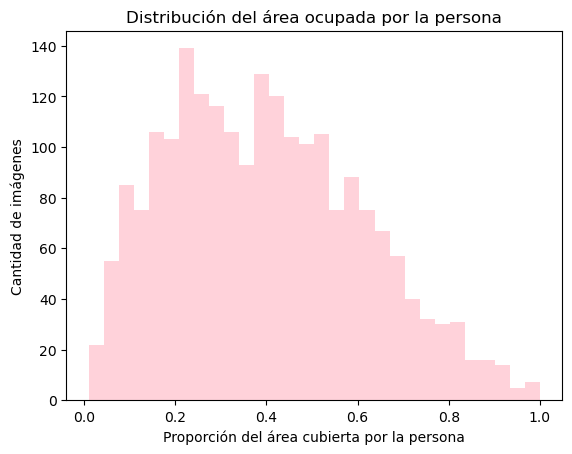

Cobertura promedio: 0.399
Rango: 0.010 – 1.000


In [102]:
mask_dir = Path(MASK_FOLDER)

coverages = [] # cantidad de pixeles identificados como persona

for p in mask_dir.glob("*.png"):
    mask = np.array(Image.open(p))[:, :, 0]   # un canal, valores {0,1}
    h, w = mask.shape
    coverage = mask.sum() / (h * w)
    coverages.append(coverage)

coverages = np.array(coverages)

plt.hist(coverages, bins=30, color='pink', alpha=0.7)
plt.xlabel("Proporción del área cubierta por la persona") # 0 nada , 1 toda la imagen
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución del área ocupada por la persona")
plt.show()

print(f"Cobertura promedio: {coverages.mean():.3f}")
print(f"Rango: {coverages.min():.3f} – {coverages.max():.3f}")


Podemos ver que en la mayoría de los casos, la persona ocupa el 40% de la imagen, es decir, el 60% de la imagen es el fondo.

El rango va de 0.01 a 1, por lo que hay imagenes en las que la persona casi no se ve e imagenes con primeros planos.

Encontradas: 31 imágenes con cobertura <= 0.050


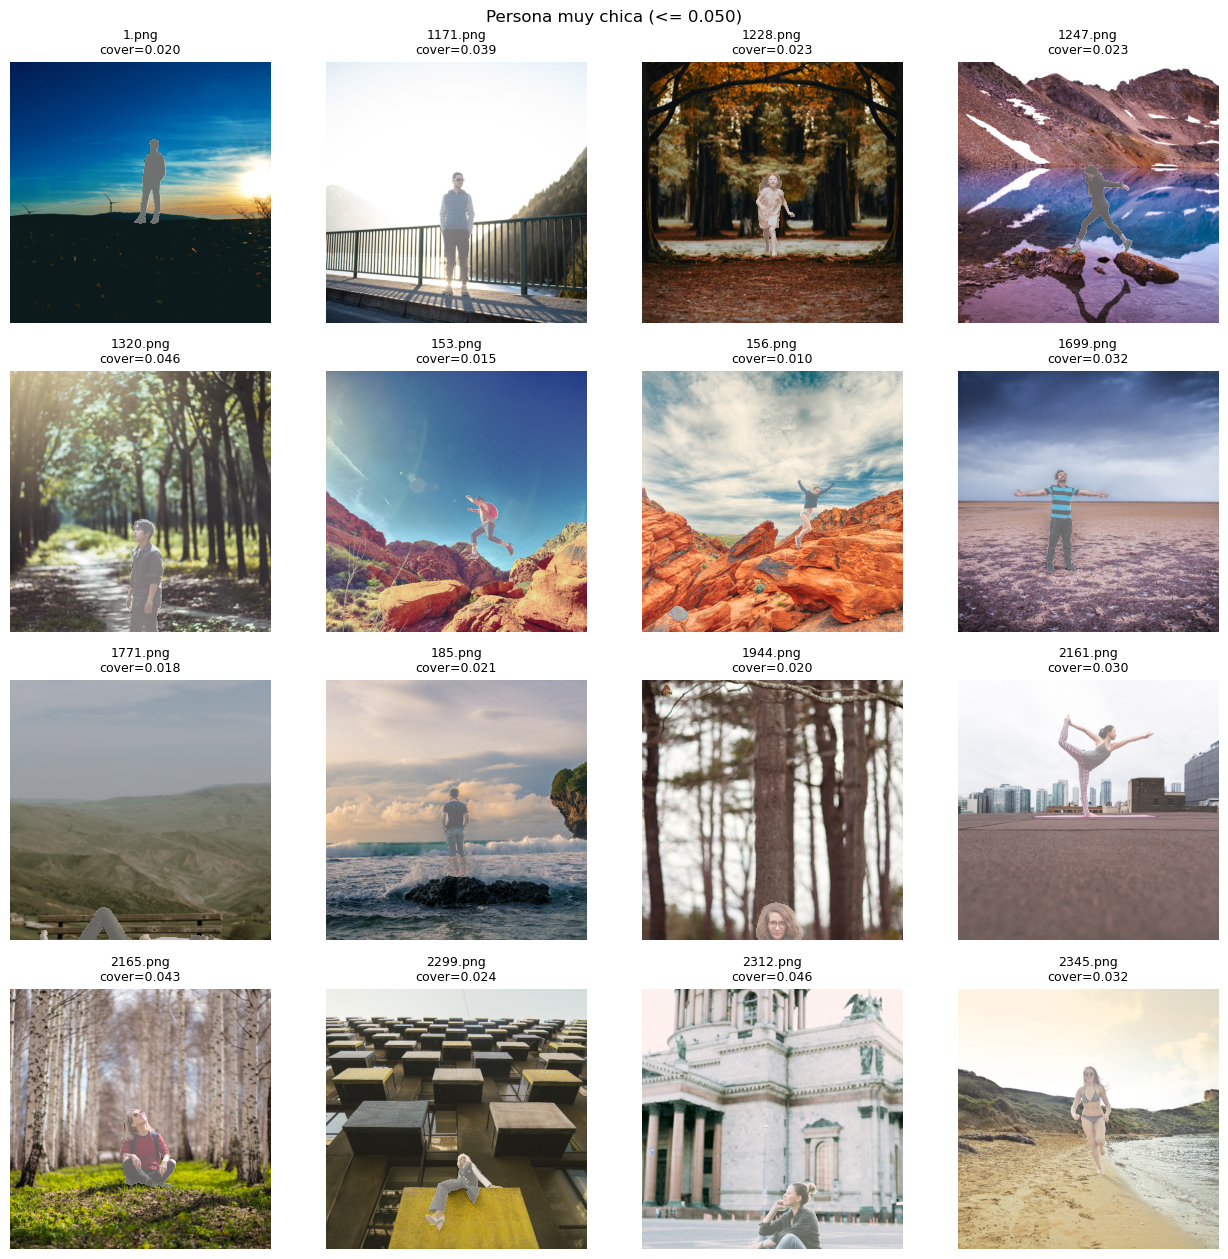

Encontradas: 51 imágenes con cobertura >= 0.850


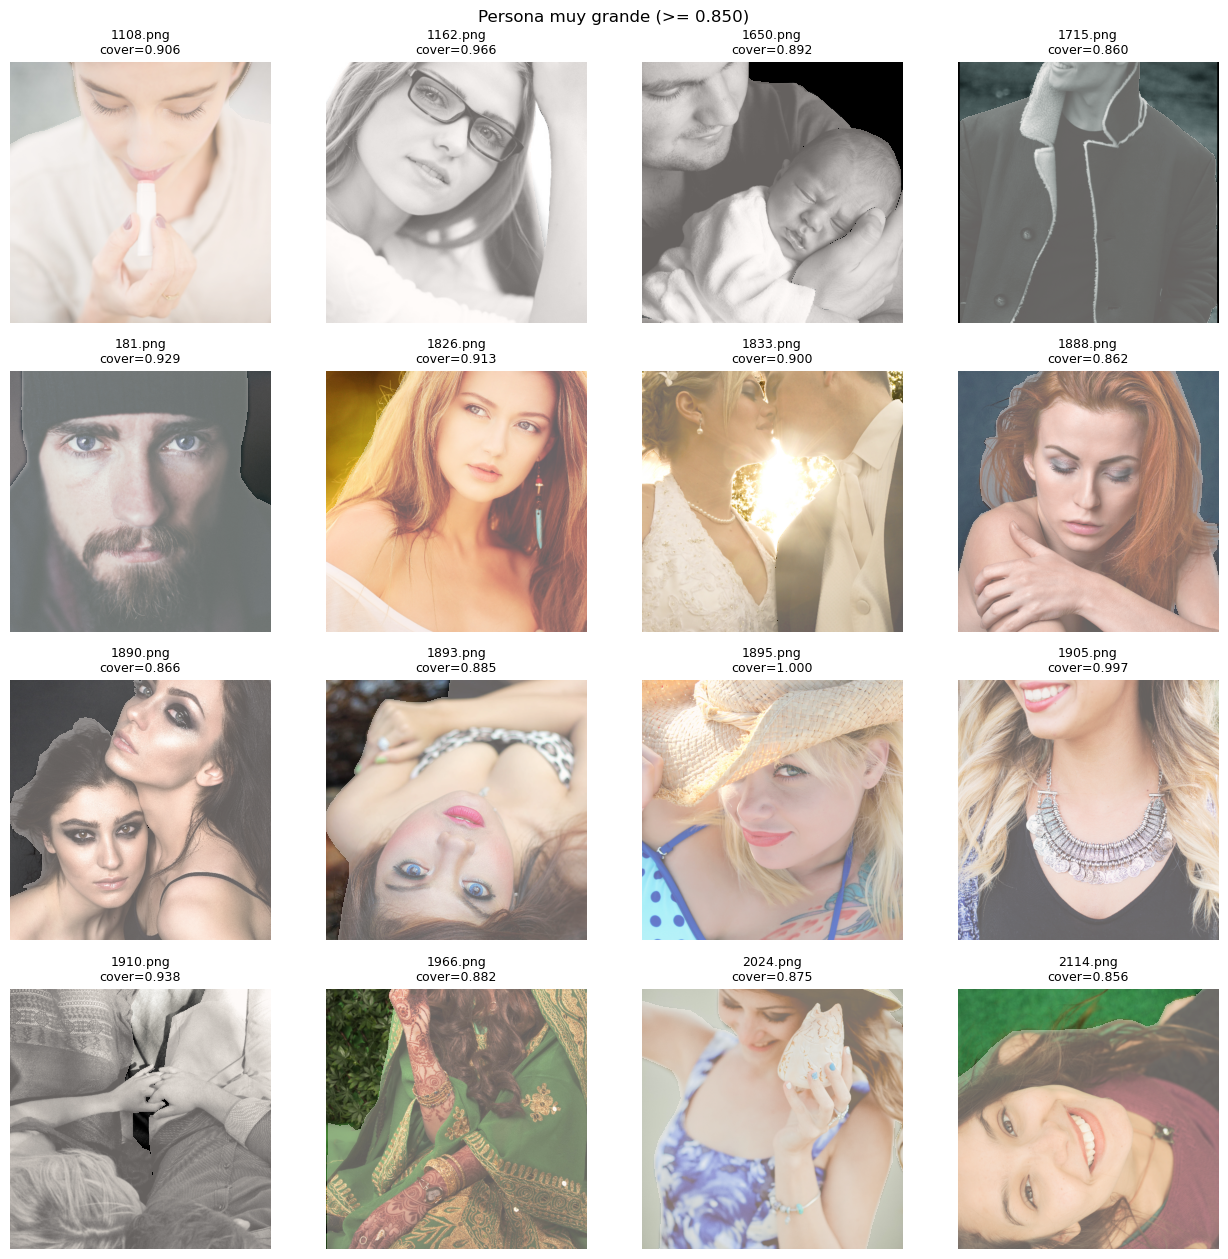

In [103]:
def _read_mask(path):
    m = np.array(Image.open(path))
    if m.ndim == 3:          
        m = m[:, :, 0]
    m = (m > 0).astype(np.uint8)
    return m  # HxW en {0,1}

def _read_rgb(path):
    im = Image.open(path)
    if im.mode != "RGB":
        im = im.convert("RGB")
    return np.array(im)      # HxWx3 uint8

def _coverage(mask):
    h, w = mask.shape
    return float(mask.sum()) / float(h * w + 1e-9)

def _build_image_index(image_dir):
    image_dir = Path(image_dir)
    idx = {}
    for p in image_dir.rglob("*"):
        if p.suffix.lower() in {".png",".jpg",".jpeg",".tif",".tiff",".bmp"}:
            idx[p.stem] = p
    return idx

def _overlay(ax, img, mask, alpha=0.35):
    ax.imshow(img)
    ax.imshow(np.where(mask>0, 1.0, np.nan), cmap="Reds", alpha=alpha, interpolation="nearest")
    ax.axis("off")

# persona muy chica (cobertura <= max_frac)

def find_small_person_with_overlay(mask_dir, image_dir, max_frac=0.10, sample_show=12, cols=4, alpha=0.35):
    mask_dir = Path(mask_dir)
    image_idx = _build_image_index(image_dir)

    matches, fracs = [], []
    paths = sorted([p for p in mask_dir.rglob("*") if p.suffix.lower() in {".png",".jpg",".jpeg",".tif",".tiff",".bmp"}])

    for mp in paths:
        m = _read_mask(mp)
        f = _coverage(m)
        if f <= max_frac:
            if mp.stem in image_idx:
                matches.append((image_idx[mp.stem], mp))
                fracs.append(f)

    print(f"Encontradas: {len(matches)} imágenes con cobertura <= {max_frac:.3f}")

    if matches:
        k = min(sample_show, len(matches))
        rows = math.ceil(k / cols)
        plt.figure(figsize=(3.2*cols, 3.2*rows))
        for i, (ip, mp) in enumerate(matches[:k]):
            img = _read_rgb(ip); m = _read_mask(mp)
            ax = plt.subplot(rows, cols, i+1)
            _overlay(ax, img, m, alpha=alpha)
            ax.set_title(f"{ip.name}\ncover={_coverage(m):.3f}", fontsize=9)
        plt.suptitle(f"Persona muy chica (<= {max_frac:.3f})")
        plt.tight_layout()
        plt.show()

    return matches, fracs  # lista de (image_path, mask_path), y coberturas


# persona muy grande (cobertura >= min_frac)

def find_large_person_with_overlay(mask_dir, image_dir, min_frac=0.80, sample_show=12, cols=4, alpha=0.35):
    mask_dir = Path(mask_dir)
    image_idx = _build_image_index(image_dir)

    matches, fracs = [], []
    paths = sorted([p for p in mask_dir.rglob("*") if p.suffix.lower() in {".png",".jpg",".jpeg",".tif",".tiff",".bmp"}])

    for mp in paths:
        m = _read_mask(mp)
        f = _coverage(m)
        if f >= min_frac:
            if mp.stem in image_idx:
                matches.append((image_idx[mp.stem], mp))
                fracs.append(f)

    print(f"Encontradas: {len(matches)} imágenes con cobertura >= {min_frac:.3f}")

    if matches:
        k = min(sample_show, len(matches))
        rows = math.ceil(k / cols)
        plt.figure(figsize=(3.2*cols, 3.2*rows))
        for i, (ip, mp) in enumerate(matches[:k]):
            img = _read_rgb(ip); m = _read_mask(mp)
            ax = plt.subplot(rows, cols, i+1)
            _overlay(ax, img, m, alpha=alpha)
            ax.set_title(f"{ip.name}\ncover={_coverage(m):.3f}", fontsize=9)
        plt.suptitle(f"Persona muy grande (>= {min_frac:.3f})")
        plt.tight_layout()
        plt.show()

    return matches, fracs

# alpha transparencia con la que se superpone imagen y mascara

small, small_fracs = find_small_person_with_overlay(
    mask_dir=MASK_FOLDER, image_dir=IMG_FOLDER,
    max_frac=0.05, sample_show=16, cols=4, alpha=0.4
)

large, large_fracs = find_large_person_with_overlay(
    mask_dir=MASK_FOLDER, image_dir=IMG_FOLDER,
    min_frac=0.85, sample_show=16, cols=4, alpha=0.4
)


## Conclusión de la exploración de datos

El conjunto de datos presenta imagenes y máscaras del mismo tamaño (800×800 px) y sin duplicados. 

Las máscaras son todas RGB, mientras que las imágenes originales poseen entre 1, 3 y 4 canales. El canal adicional de las imágenes RGBA corresponde a transparencia, que no aporta información útil para la segmentación; por lo tanto, se decidió convertir todas las imágenes a RGB para unificar la entrada de la red y conservar la información de color relevante. De todas maneras, se probará primero con imagenes de entrada en blanco y negro para ser fieles al paper.

Los valores de MEAN y STD por canal son similares entre sí, confirmando buen balance de colores y bastante variabilidad en intensidades. El histograma de intensidades refuerza estas observaciones, demostrando que el dataset no tiene sesgos de color.

El análisis del espacio ocupado por la persona en la imagen demuestra una ocupación promedio del 40%, con un rango de 0.01 a 1. Esto significa que hay gran variación de escala de personas en las imágenes, donde encontramos tanto primeros planos como imagenes donde la persona está muy chica y es casi todo fondo.

En conclusión, el dataset está balanceado en términos de color y es diverso, lo que es adecuado para entrenar un modelo de segmentación.
Antes del entrenamiento, se deben normalizar las imágenes con los valores calculados de MEAN y STD.

Vamos a probar entrenar con un mínimo de transformaciones para empezar.

Luego veremos si el resultado mejora al aplicar data augmentation, ya que la variabilidad que hay en nuestro dataset ayuda a generalizar pero también hace que sea dificil de aprender.

# Data loaders

El dataset contiene una carpeta train, con imagenes y máscaras, y una carpeta test, solamente con imagenes.

Para poder entrenar y generar métricas, dividiremos la carpeta de train en train/val/test_local con una proporción de 80%/10%/10%.

Definimos la clase SegDataset para generar train/val/test_local manteniendo los pares (imagen, mascara).

In [104]:
class SegDataset(Dataset):
    """
    Lee pares (imagen, máscara) desde:
      root/images/*.png|jpg...
      root/masks/  con el mismo nombre de archivo
    Devuelve tensores: img -> float32 [0,1], (C,H,W); mask -> long (H,W)
    """
    def __init__(self, root, image_dir="images", mask_dir="masks", transform_img=None, transform_mask=None, rgb=False):
        self.root = Path(root)
        self.images_path = self.root / image_dir
        self.masks_path  = self.root / mask_dir
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.rgb = rgb

        # Emparejar por nombre
        img_files = sorted([p for p in self.images_path.iterdir() if p.is_file()])
        names = []
        for p in img_files:
            mask_p = self.masks_path / p.name
            if mask_p.exists():
                names.append(p.name)
        if not names:
            raise RuntimeError(f"No se encontraron pares imagen-máscara en {self.images_path} y {self.masks_path}")

        self.names = names  # lista de nombres emparejados

    def __len__(self):
        return len(self.names)

    def _load_image(self, path):
        #  "L" convierte a escala de grises
        img = Image.open(path).convert("RGB" if self.rgb else "L")
        arr = np.array(img, dtype=np.float32) / 255.0  # (H, W, 3) o (H, W)
        
        if self.rgb:
            # pasar de (H, W, 3) → (3, H, W)
            arr = np.transpose(arr, (2, 0, 1))
        else:
            # pasar de (H, W) → (1, H, W)
            arr = np.expand_dims(arr, axis=0)
        
        tensor = torch.from_numpy(arr)
        return tensor

    def _load_mask(self, path):
        # Máscara como enteros de clase. Si es binaria 0/255, la pasamos a 0/1.
        m = Image.open(path).convert("L")
        arr = np.array(m)
        if arr.dtype != np.uint8:
            arr = arr.astype(np.uint8)
        # binarizar si viene 0/255
        if arr.max() == 255 and arr.min() in (0, 255):
            arr = (arr > 0).astype(np.uint8)
        tensor = torch.from_numpy(arr.astype(np.int64))  # (H,W) long
        return tensor

    def __getitem__(self, idx):
        name = self.names[idx]
        img_path  = self.images_path / name
        mask_path = self.masks_path  / name

        img  = self._load_image(img_path)
        mask = self._load_mask(mask_path)

        # Transforms opcionales (independientes para img y mask)
        if self.transform_img:
            img = self.transform_img(img)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return img, mask


In [105]:
def get_seg_dataloaders(
    root,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    seed=SEED,
    rgb=False,
    train_transform_img=None,
    train_transform_mask=None,
    val_transform_img=None,
    val_transform_mask=None
):
    """
    Genera tres DataLoaders (train, val, test) a partir de un dataset generado con la clase SegDataset.

    Parámetros
    ----------
    root : str o Path
        Ruta a la carpeta que contiene 'images' y 'masks'.
        Ejemplo: "data/train"
    batch_size 
    num_workers 
    seed 
    rgb : bool, opcional 
        Si es True, las imágenes se cargan en RGB; si es False, en escala de grises.
    train_transform_img
    train_transform_mask
    val_transform_img
    val_transform_mask 

    Retorna
    -------
    train_loader : Dataloader del conjunto de entrenamiento (80% de los datos).
    val_loader : Dataloader del conjunto de validación (10% de los datos).
    test_loader : Dataloader del conjunto de test (10% de los datos).
    """
    # dataset completo
    full_ds = SegDataset(root=root, rgb=rgb, transform_img=None, transform_mask=None)

    n = len(full_ds)
    n_train = int(0.8 * n)
    n_val   = int(0.1 * n)
    n_test  = n - n_train - n_val 

    # sacamos los indices de los (image,mask) que van a ir a cada dataloader
    g = torch.Generator().manual_seed(seed)
    train_idxs, val_idxs, test_idxs = random_split(full_ds, [n_train, n_val, n_test], generator=g)

    train_ds = SegDataset(root=root, rgb=rgb,
                          transform_img=train_transform_img,
                          transform_mask=train_transform_mask)

    val_ds = SegDataset(root=root, rgb=rgb,
                        transform_img=val_transform_img,
                        transform_mask=val_transform_mask)

    test_ds = SegDataset(root=root, rgb=rgb,
                         transform_img=val_transform_img,
                         transform_mask=val_transform_mask)    

    # Subset usando los índices del split original
    train_ds = Subset(train_ds, train_idxs.indices)
    val_ds   = Subset(val_ds, val_idxs.indices)
    test_ds  = Subset(test_ds, test_idxs.indices)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)


    return train_loader, val_loader, test_loader

# Transforms

In [106]:
# Re calculamos MEAN y STD para imagenes en blanco y negro.
imgs = []
for p in Path(IMG_FOLDER).iterdir():
    img = Image.open(p).convert("L")
    arr = np.array(img, dtype=np.float32) / 255.0
    imgs.append(arr)

arr = np.stack(imgs)
MEAN_BYN = arr.mean()
STD_BYN = arr.std()

print(f"Mean: {MEAN_BYN} ; STD: {STD_BYN}")

Mean: 0.4904857873916626 ; STD: 0.2986586093902588


In [107]:
train_transform_img_simple = T.Compose(
    [
        #T.ToImage(),  # resuelto en SegDataset
        #T.ToDtype(torch.float32, scale=True), # resuelto en SegDataset
        T.Normalize(mean=(float(MEAN_BYN),), std=(float(STD_BYN),)),
    ]
)

train_transform_mask_simple = None


val_transform_img = T.Compose(
    [
        #T.ToImage(),  
        #T.ToDtype(torch.float32, scale=True),
        T.Normalize(mean=(float(MEAN_BYN),), std=(float(STD_BYN),)),
    ]
)

val_transform_mask = None

# Arquitectura UNet

En el [paper de UNet](https://arxiv.org/pdf/1505.04597) se define la arquitectura de la red como se muestra en la imagen:


![https://arxiv.org/pdf/1505.04597](assets/UNet_arquitecture.png)

Como entrada a la red tenemos "recortes" de las imagenes originales. Esto se hace asi en el paper porque las imagenes con las que querian entrenar eran demasiado grandes. Estos recortes se ensamblan de nuevo al pasar por el camino de salida.

Las imágenes de entrada son de 1 canal, es decir, en blanco y negro.

Tenemos 4 niveles del lado izquierdo, un cuello de botella al final y luego 4 niveles mas del lado derecho. Éstos se componen de la siguiente manera:

**CONTRACTING PATH (LEFT)**

Conv 3x3 sin padding -> ReLU -> Conv 3x3 sin padding -> ReLU -> Guardar feature map -> MaxPool 2x2 stride 2 -> Aumentar cantidad de canales

Repetir bloque 4 veces.

**BOTTLE NECK**

Conv 3x3 sin padding -> ReLU -> Conv 3x3 sin padding -> ReLU

**EXPANSIVE PATH (RIGHT)**

UpConv 2x2 (reduce a la mitad los canales) -> Recortar feature map del encoder para igualar tamaños y concatenar con el recortado (skip connection) -> Conv 3x3 sin padding -> ReLU -> Conv 3x3 sin padding -> ReLU

Repetir bloque 4 veces.

**SALIDA**

Conv 1x1 (mapear cada pixel del feature map al numero de clases)

<u>Tener en cuenta:</u>

* Si se hace N veces un Max Pool 2x2 => el size de la imagen de entrada debe ser divisible entre 2^N.
* Como se hacen convoluciones sin padding, el size de la imagen de entrada tiene que ser mayor al size de salida deseado.
* Para que al recomponer los "recortes" no aparezcan bordes o espacios, hay que elegir tamaños que respeten tambien el ser divisibles entre 2^N.


# Modelo

## UNet clásica

Para comenzar, implementaremos la UNet tal y como se la presenta en el paper.

In [108]:
def center_crop(enc_feat, tgt_h, tgt_w):
    _, _, h, w = enc_feat.shape           # tamaño del mapa del encoder
    dh = (h - tgt_h) // 2                 # recorte superior e inferior
    dw = (w - tgt_w) // 2                 # recorte izquierdo y derecho
    return enc_feat[:, :, dh:dh+tgt_h, dw:dw+tgt_w]

In [109]:
class UNet(nn.Module):
    def __init__(self, n_class, padding=0):
        super().__init__()
        
        # encoder convs 
        self.conv1  = nn.Conv2d(1,   64, 3, padding=padding)
        self.conv2  = nn.Conv2d(64,  64, 3, padding=padding)
        self.conv3  = nn.Conv2d(64,  128, 3, padding=padding)
        self.conv4  = nn.Conv2d(128, 128, 3, padding=padding)
        self.conv5  = nn.Conv2d(128, 256, 3, padding=padding)
        self.conv6  = nn.Conv2d(256, 256, 3, padding=padding)
        self.conv7  = nn.Conv2d(256, 512, 3, padding=padding)
        self.conv8  = nn.Conv2d(512, 512, 3, padding=padding)
        
        # bottleneck
        self.conv9  = nn.Conv2d(512, 1024, 3, padding=padding)
        self.conv10 = nn.Conv2d(1024,1024, 3, padding=padding)
        
        # decoder convs por nivel 
        self.conv11 = nn.Conv2d(1024, 512, 3, padding=padding)  # d4
        self.conv12 = nn.Conv2d(512,  512, 3, padding=padding)
        self.conv13 = nn.Conv2d(512,  256, 3, padding=padding)  # d3
        self.conv14 = nn.Conv2d(256,  256, 3, padding=padding)
        self.conv15 = nn.Conv2d(256,  128, 3, padding=padding)  # d2
        self.conv16 = nn.Conv2d(128,  128, 3, padding=padding)
        self.conv17 = nn.Conv2d(128,   64, 3, padding=padding)  # d1
        self.conv18 = nn.Conv2d(64,    64, 3, padding=padding)

        # upconvs 2x2 stride 2
        self.upconv1 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(512,  256, 2, stride=2)
        self.upconv3 = nn.ConvTranspose2d(256,  128, 2, stride=2)
        self.upconv4 = nn.ConvTranspose2d(128,   64, 2, stride=2)

        self.maxPool = nn.MaxPool2d(2)
        self.relu    = nn.ReLU(inplace=True)
        self.outconv = nn.Conv2d(64, n_class, kernel_size=1)  

    def forward(self, x):
        # ================ ENCODER ================
        # input x: (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, IN_CHANNELS) (en el paper: 572x572x1)
        e1 = self.conv1(x)     # output: batch_sizex570x570x64 ((w-k+2P)/s)+1
        e1 = self.relu(e1)     # output: batch_sizex570x570x64
        e1 = self.conv2(e1)    # output: 568x568x64
        e1 = self.relu(e1)     # output: 568x568x64 ;; guardo e1 para concatenar luego
        p1 = self.maxPool(e1)  # output: 284x284x64 

        e2 = self.conv3(p1)    # output: 282x282x128 aumenta al doble la cantidad de canales
        e2 = self.relu(e2)     # output: 282x282x128
        e2 = self.conv4(e2)    # output: 280x280x128
        e2 = self.relu(e2)     # output: 280x280x128
        p2 = self.maxPool(e2)  # output: 140x140x128

        e3 = self.conv5(p2)    # output: 138x138x256 aumenta al doble la cantidad de canales
        e3 = self.relu(e3)     # output: 138x138x256
        e3 = self.conv6(e3)    # output: 136x136x256
        e3 = self.relu(e3)     # output: 136x136x256
        p3 = self.maxPool(e3)  # output: 68x68x256    

        e4 = self.conv7(p3)    # output: 66x66x512 aumenta al doble la cantidad de canales
        e4 = self.relu(e4)     # output: 66x66x512
        e4 = self.conv8(e4)    # output: 64x64x512
        e4 = self.relu(e4)     # output: 64x64x512
        p4 = self.maxPool(e4)  # output: 32x32x512         

        # ================ BOTTLE NECK ================
        # input: 32x32x512
        b = self.conv9(p4)    # output: 30x30x1024 aumenta al doble la cantidad de canales
        b = self.relu(b)     # output: 30x30x1024
        b = self.conv10(b)   # output: 28x28x1024 
        b = self.relu(b)     # output: 28x28x1024

        # ================ DECODER ================
        d4 = self.upconv1(b)
        e4_crop = center_crop(e4, d4.shape[2], d4.shape[3]) 
        d4 = torch.cat([e4_crop, d4], dim=1) # concat en los canales
        d4 = self.conv11(d4)
        d4 = self.relu(d4)
        d4 = self.conv12(d4)
        d4 = self.relu(d4)

        d3 = self.upconv2(d4)
        e3_crop = center_crop(e3, d3.shape[2], d3.shape[3])
        d3 = torch.cat([e3_crop, d3], dim=1)
        d3 = self.conv13(d3)
        d3 = self.relu(d3)
        d3 = self.conv14(d3)
        d3 = self.relu(d3)

        d2 = self.upconv3(d3)
        e2_crop = center_crop(e2, d2.shape[2], d2.shape[3])
        d2 = torch.cat([e2_crop, d2], dim=1)
        d2 = self.conv15(d2)
        d2 = self.relu(d2)
        d2 = self.conv16(d2)
        d2 = self.relu(d2)

        d1 = self.upconv4(d2)
        e1_crop = center_crop(e1, d1.shape[2], d1.shape[3])
        d1 = torch.cat([e1_crop, d1], dim=1)
        d1 = self.conv17(d1)
        d1 = self.relu(d1)
        d1 = self.conv18(d1)
        d1 = self.relu(d1)

        # ================ OUTPUT ================
        return self.outconv(d1)

model = UNet(n_class=2)  # por ejemplo
summary(model, input_size=(1, 1, 572, 572))

Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [1, 2, 388, 388]          --
├─Conv2d: 1-1                            [1, 64, 570, 570]         640
├─ReLU: 1-2                              [1, 64, 570, 570]         --
├─Conv2d: 1-3                            [1, 64, 568, 568]         36,928
├─ReLU: 1-4                              [1, 64, 568, 568]         --
├─MaxPool2d: 1-5                         [1, 64, 284, 284]         --
├─Conv2d: 1-6                            [1, 128, 282, 282]        73,856
├─ReLU: 1-7                              [1, 128, 282, 282]        --
├─Conv2d: 1-8                            [1, 128, 280, 280]        147,584
├─ReLU: 1-9                              [1, 128, 280, 280]        --
├─MaxPool2d: 1-10                        [1, 128, 140, 140]        --
├─Conv2d: 1-11                           [1, 256, 138, 138]        295,168
├─ReLU: 1-12                             [1, 256, 138, 138]       

# Entrenamiento

El tamaño de la máscara es igual al que tiene la imagen original, antes de entrar a la red. 

Cuando la imagen sale, su tamaño ya no es el mismo, entonces tenemos que ajustar la máscara para que tenga ese mismo tamaño; así evitamos que de error la loss.

Para esto, modificamos las funciones de train y eval en utils.py.

## Funciones Auxiliares

### Dice Loss

In [20]:
def get_dice(probs, targets, smooth=1e-7):
    # Calcular intersección (píxeles correctos de esa clase)
    intersection = (probs * targets).sum()
    # Calcular unión (píxeles GT + pred marcados como esa clase)
    union = probs.sum() + targets.sum()
    # Aplicar fórmula de Dice (2 * intersección / unión)
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

In [29]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super().__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        probs = torch.softmax(logits, dim=1)[:, 1, ...]  # clase 1
        targets = targets.float()
        dice = get_dice(probs, targets, self.smooth)
        diceLoss = 1 - dice 
        return diceLoss 


### Model segmentation report
Creamos una nueva funcion para el classification report:

In [35]:
@torch.no_grad()
def model_segmentation_report(model, dataloader, device, nclasses, do_confusion_matrix=True, show_dice_loss=False):
    model.eval()
    ys, ps = [], []

    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device)  # y: (N,H,W) long
        logits = model(x)                         # (N,C,h,w)

        # Alinear tamaños
        logits = match_output_dim(logits, y)
        pred = logits.argmax(1)                      # (N,h,w)

        # Aplanar por píxel
        ys.append(y.detach().cpu().numpy().ravel())
        ps.append(pred.detach().cpu().numpy().ravel())

    y_true = np.concatenate(ys, axis=0)
    y_pred = np.concatenate(ps, axis=0)

    # =============== métricas base ===============
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(
        y_true, y_pred,
        labels=list(range(nclasses)),
        target_names=[str(i) for i in range(nclasses)],
        output_dict=True,
        zero_division=0
    )

     # ======== DICE por clase ========
    if show_dice_loss:
        dice_scores = {}
        supports = {}
        for c in range(nclasses):
            # Crear máscara binaria del ground truth para la clase c
            y_true_c = (y_true == c).astype(np.uint8)
            # Crear máscara binaria de la predicción para la clase c
            y_pred_c = (y_pred == c).astype(np.uint8)
            dice = get_dice(y_true_c, y_pred_c)
            dice_scores[str(c)] = dice
            supports[str(c)] = y_true_c.sum()
            # Agregar el valor de Dice al reporte de esa clase
            if str(c) in report:
                report[str(c)]["dice"] = dice
    
        

        # ========= promedios globales =========
        # macro avg = promedio simple entre clases
        macro_dice = float(np.mean(list(dice_scores.values())))
        # weighted avg = promedio ponderado por soporte (cantidad de píxeles por clase)
        total_support = sum(supports.values())
        weighted_dice = float(
            sum(dice_scores[c] * supports[c] for c in dice_scores) / (total_support + 1e-7)
        )

        # agregamos estas filas al reporte
        report["macro avg"]["dice"] = macro_dice
        report["weighted avg"]["dice"] = weighted_dice


    print(f"Accuracy: {acc:.4f}")
    print(report)
    # report["accuracy"] = {'f1-score': report["accuracy"]}
    print_metrics_report(report)

    cm = None
    if do_confusion_matrix:
        cm = confusion_matrix(y_true, y_pred, labels=list(range(nclasses)))
        plot_confusion_matrix(cm, title="Confusion matrix")

    return acc, report, cm


## Entreneando original UNet

In [111]:
train_loader_1, val_loader_1, test_loader_1 = get_seg_dataloaders("data/train", 
                                                            batch_size=BATCH_SIZE, 
                                                            num_workers=NUM_WORKERS, 
                                                            seed=SEED, 
                                                            rgb=False,
                                                            train_transform_img=train_transform_img_simple,
                                                            train_transform_mask=train_transform_mask_simple, 
                                                            val_transform_img=val_transform_img, 
                                                            val_transform_mask=val_transform_mask)


In [25]:
model_1 = UNet(n_class=2).to(DEVICE)
criterion_1 = nn.CrossEntropyLoss()
optimizer_1  = torch.optim.Adam(model_1.parameters(), lr=1e-3)

epoch_train_errors_1, epoch_val_errors_1 = train(model_1, optimizer_1, criterion_1, 
                                                 train_loader_1, val_loader_1, DEVICE,
                                                 do_early_stopping=False)

Epoch: 001 | Train Loss: 0.67262 | Val Loss: 0.65666
Epoch: 002 | Train Loss: 0.66450 | Val Loss: 0.65390
Epoch: 003 | Train Loss: 0.66415 | Val Loss: 0.67127
Epoch: 004 | Train Loss: 0.66445 | Val Loss: 0.64565
Epoch: 005 | Train Loss: 0.93005 | Val Loss: 0.64805
Epoch: 006 | Train Loss: 0.66002 | Val Loss: 0.64899
Epoch: 007 | Train Loss: 0.65924 | Val Loss: 0.64320
Epoch: 008 | Train Loss: 0.65865 | Val Loss: 0.64265
Epoch: 009 | Train Loss: 0.66045 | Val Loss: 0.64809
Epoch: 010 | Train Loss: 0.66347 | Val Loss: 0.65345


In [ ]:
#report_1 = model_classification_report(model_1, test_loader_1, DEVICE, NUM_CLASES)
acc, rep, cm = model_segmentation_report(
    model_1, test_loader_1, DEVICE, NUM_CLASES,
    output_dict=False, do_confusion_matrix=True
)

Accuracy: 0.6094

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76  48729556
           1       0.56      0.02      0.03  31422860

    accuracy                           0.61  80152416
   macro avg       0.59      0.50      0.39  80152416
weighted avg       0.59      0.61      0.47  80152416

Matriz de confusión:
[[48325500   404056]
 [30905872   516988]]


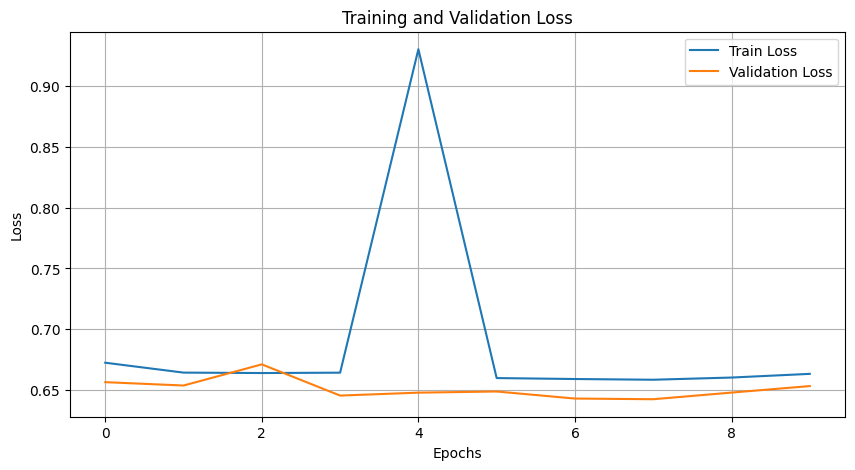

In [29]:
plot_training(epoch_train_errors_1, epoch_val_errors_1)

In [ ]:
model_1_2 = UNet(n_class=2).to(DEVICE)
criterion_1_2 = nn.CrossEntropyLoss()
optimizer_1_2  = torch.optim.Adam(model_1_2.parameters(), lr=1e-3)

epoch_train_errors_1_2, epoch_val_errors_1_2 = train(model_1_2, optimizer_1_2, criterion_1_2, 
                                                 train_loader_1, val_loader_1, DEVICE,
                                                 do_early_stopping=False)

In [ ]:
#report_1 = model_classification_report(model_1, test_loader_1, DEVICE, NUM_CLASES)
acc, rep, cm = model_segmentation_report(
    model_1_2, test_loader_1, DEVICE, NUM_CLASES,
    output_dict=False, do_confusion_matrix=True
)

TypeError: model_segmentation_report() got an unexpected keyword argument 'output_dict'

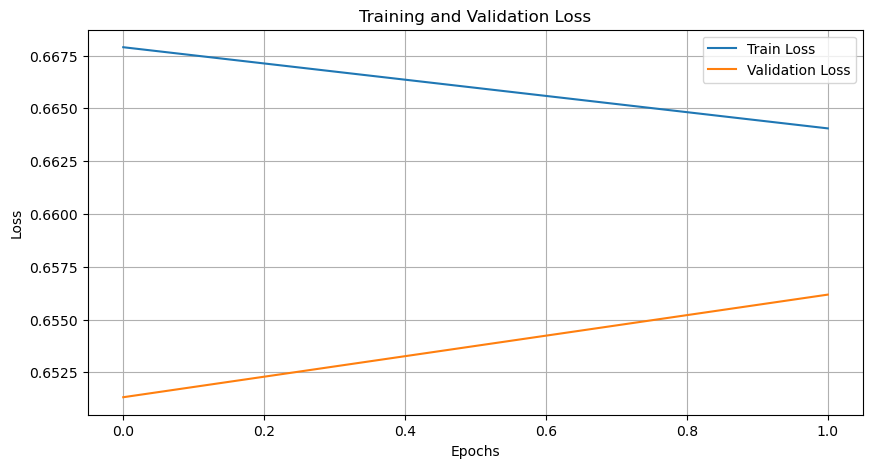

In [48]:
plot_training(epoch_train_errors_1_2, epoch_val_errors_1_2)

## Entrenendo UNet con padding 1

La idea de esto es simplificar la arquitectura manteniendo el tamaño de las imagenes para mantener mas información de la imagen en cada capa y no tener que hacer un resize en la parte del decoder y simplemente concatenar los feature maps. 

In [51]:
BATCH_SIZE = 3

In [52]:
train_loader_pad, val_loader_pad, test_loader_pad = get_seg_dataloaders("data/train", 
                                                            batch_size=BATCH_SIZE, 
                                                            num_workers=NUM_WORKERS, 
                                                            seed=SEED, 
                                                            rgb=False,
                                                            train_transform_img=train_transform_img_simple,
                                                            train_transform_mask=train_transform_mask_simple, 
                                                            val_transform_img=val_transform_img, 
                                                            val_transform_mask=val_transform_mask)

In [53]:
PADDING = 1

In [56]:
unet_pad_1 = UNet(n_class=2, padding=PADDING).to(DEVICE)
criterion_pad_1 = nn.CrossEntropyLoss()
optimizer_pad_1  = torch.optim.Adam(unet_pad_1.parameters(), lr=1e-3)

epoch_train_errors_pad_1, epoch_val_errors_pad_1 = train(unet_pad_1, optimizer_pad_1, criterion_pad_1, 
                                                 train_loader_pad, val_loader_pad, DEVICE,
                                                 do_early_stopping=False, epochs=10)

Epoch: 001 | Train Loss: 0.68708 | Val Loss: 0.63494
Epoch: 002 | Train Loss: 0.64898 | Val Loss: 0.62415
Epoch: 003 | Train Loss: 0.64420 | Val Loss: 0.62593
Epoch: 004 | Train Loss: 0.64815 | Val Loss: 0.62272
Epoch: 005 | Train Loss: 0.64023 | Val Loss: 0.63433
Epoch: 006 | Train Loss: 0.64312 | Val Loss: 0.64009
Epoch: 007 | Train Loss: 0.63870 | Val Loss: 0.67641
Epoch: 008 | Train Loss: 0.63355 | Val Loss: 0.60641
Epoch: 009 | Train Loss: 0.63208 | Val Loss: 0.61085
Epoch: 010 | Train Loss: 0.63052 | Val Loss: 0.66964


Accuracy: 0.6410
Dice: 0.5634
Reporte de clasificación:

              precision      recall      f1-score     support        dice    
0               0.6528       0.8741       0.7474      83232184.0    0.7474   
1               0.5893       0.2798       0.3794      53727816.0    0.3794   
accuracy                                  0.6410                             
macro avg        0.621        0.577       0.5634     136960000.0    0.5634   
weighted avg    0.6279        0.641       0.6031     136960000.0    0.6031   



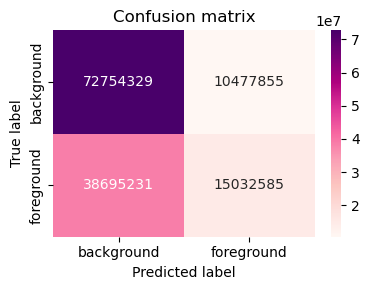

In [122]:
#report_1 = model_classification_report(model_1, test_loader_1, DEVICE, NUM_CLASES)
acc, rep, cm = model_segmentation_report(
    unet_pad_1, test_loader_pad, DEVICE, NUM_CLASES,
    do_confusion_matrix=True, show_dice_loss=True
)

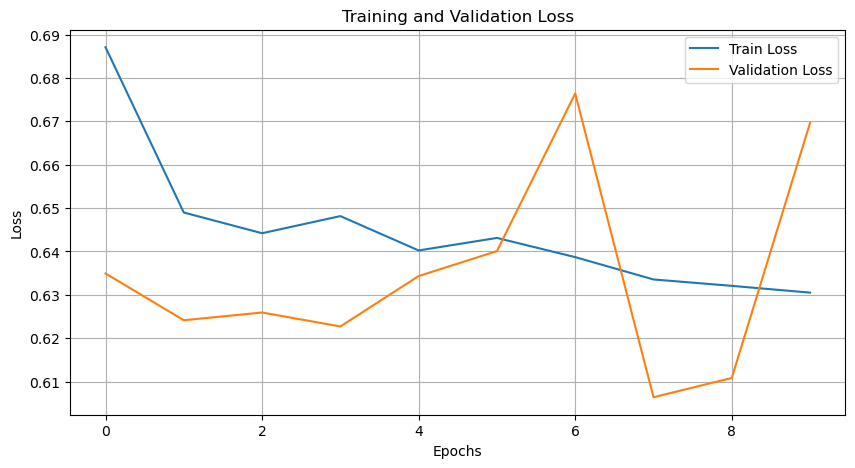

In [58]:
plot_training(epoch_train_errors_pad_1, epoch_val_errors_pad_1)

## Entreneando UNet con padding 1 + Deci loss


In [47]:
BATCH_SIZE = 1
PADDING = 1
epochs = 10

In [48]:
train_loader_pad, val_loader_pad, test_loader_pad = get_seg_dataloaders("data/train", 
                                                            batch_size=BATCH_SIZE, 
                                                            num_workers=NUM_WORKERS, 
                                                            seed=SEED, 
                                                            rgb=False,
                                                            train_transform_img=train_transform_img_simple,
                                                            train_transform_mask=train_transform_mask_simple, 
                                                            val_transform_img=val_transform_img, 
                                                            val_transform_mask=val_transform_mask)

In [72]:
unet_dice = UNet(n_class=2, padding=PADDING).to(DEVICE)
criterion_dice = DiceLoss()
optimizer_dice  = torch.optim.Adam(unet_dice.parameters(), lr=1e-3)

epoch_train_errors_dice, epoch_val_errors_dice = train(unet_dice, optimizer_dice, criterion_dice, 
                                                 train_loader_pad, val_loader_pad, DEVICE,
                                                 do_early_stopping=False, epochs=epochs)

Batch loss: 0.5521062612533569
Output shape: torch.Size([1, 2, 800, 800])
Target shape: torch.Size([1, 800, 800])
0/1706 - train_loss: 0.552
20/1706 - train_loss: 0.437
40/1706 - train_loss: 0.407
60/1706 - train_loss: 0.426
80/1706 - train_loss: 0.433
100/1706 - train_loss: 0.431
120/1706 - train_loss: 0.438
140/1706 - train_loss: 0.441
160/1706 - train_loss: 0.442
180/1706 - train_loss: 0.450
200/1706 - train_loss: 0.454
220/1706 - train_loss: 0.452
240/1706 - train_loss: 0.461
260/1706 - train_loss: 0.466
280/1706 - train_loss: 0.465
300/1706 - train_loss: 0.461
320/1706 - train_loss: 0.462
340/1706 - train_loss: 0.461
360/1706 - train_loss: 0.461
380/1706 - train_loss: 0.464
400/1706 - train_loss: 0.462
420/1706 - train_loss: 0.462
440/1706 - train_loss: 0.461
460/1706 - train_loss: 0.463
480/1706 - train_loss: 0.465
500/1706 - train_loss: 0.467
520/1706 - train_loss: 0.469
540/1706 - train_loss: 0.467
560/1706 - train_loss: 0.468
580/1706 - train_loss: 0.469
600/1706 - train_loss:

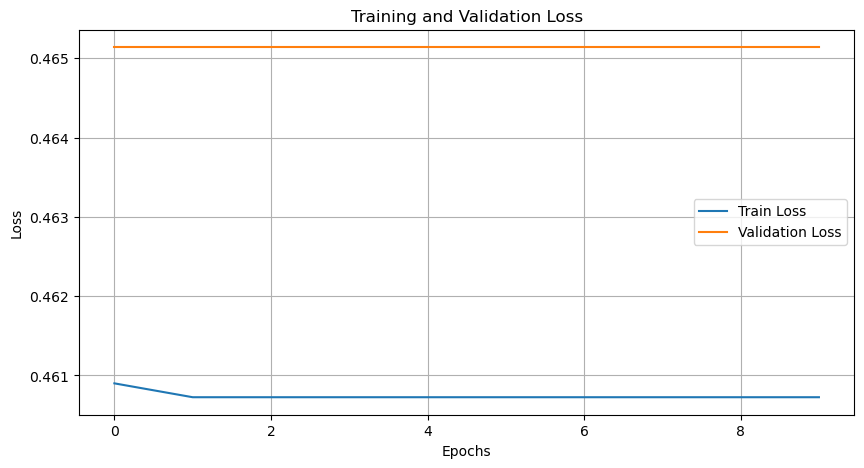

In [74]:
plot_training(epoch_train_errors_dice, epoch_val_errors_dice)

Accuracy: 0.3923
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 83232184.0, 'dice': np.float64(1.201458320497752e-15)}, '1': {'precision': 0.3922883761682243, 'recall': 1.0, 'f1-score': 0.563515982583806, 'support': 53727816.0, 'dice': np.float64(0.5635159825838063)}, 'accuracy': 0.3922883761682243, 'macro avg': {'precision': 0.19614418808411216, 'recall': 0.5, 'f1-score': 0.281757991291903, 'support': 136960000.0, 'dice': 0.28175799129190376}, 'weighted avg': {'precision': 0.15389017007670225, 'recall': 0.3922883761682243, 'f1-score': 0.2210607697526426, 'support': 136960000.0, 'dice': 0.22106076975264333}}
Dice: 0.2818


Reporte de clasificación:

               precision     recall      f1-score       support       dice    
0                0.00         0.00         0.00      8.323218e+07     0.00    
1                0.39         1.00         0.56      5.372782e+07     0.56    
accuracy         0.39         0.39         0.39      3.900000e-01     0.39    
macro

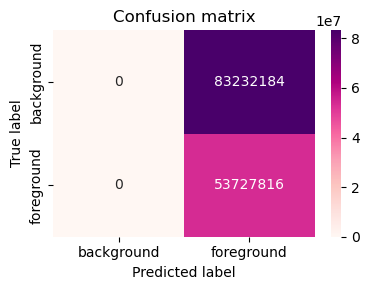

In [73]:
acc, rep, cm = model_segmentation_report(
    unet_dice, test_loader_pad, DEVICE, NUM_CLASES,
    do_confusion_matrix=True, show_dice_loss=True
)

## Entreneando UNet con padding 1 + BInary Deci loss


In [31]:
import torch
import torch.nn as nn

class BinaryDiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super().__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        """
        logits: Tensor (B, 1, H, W) — salida del modelo (sin sigmoid)
        targets: Tensor (B, H, W) o (B, 1, H, W) — máscara binaria {0,1}
        """
        # Asegurar que los targets tengan misma forma que logits
        if targets.ndim == 3:
            targets = targets.unsqueeze(1)  # (B,1,H,W)

        probs = torch.sigmoid(logits)       # convierte logits a probabilidad [0,1]
        targets = targets.float()

        # Calcular intersección y unión por batch
        intersection = (probs * targets).sum(dim=(2, 3))
        union = probs.sum(dim=(2, 3)) + targets.sum(dim=(2, 3))

        dice = (2 * intersection + self.smooth) / (union + self.smooth)

        # Retornar 1 - promedio del coeficiente Dice
        return 1 - dice.mean()


In [33]:
# Crear modelo con una sola salida
unet_dice = UNet(n_class=1, padding=PADDING).to(DEVICE)

# Definir pérdida y optimizador
criterion = BinaryDiceLoss()
optimizer = torch.optim.Adam(unet_dice.parameters(), lr=1e-3)

# Entrenar
epoch_train_errors_dice, epoch_val_errors_dice = train(
    unet_dice,
    optimizer,
    criterion,
    train_loader_pad,
    val_loader_pad,
    DEVICE,
    do_early_stopping=False,
    epochs=10
)


Epoch: 001 | Train Loss: 0.46119 | Val Loss: 0.46476
Epoch: 002 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 003 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 004 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 005 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 006 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 007 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 008 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 009 | Train Loss: 0.46073 | Val Loss: 0.46476
Epoch: 010 | Train Loss: 0.46073 | Val Loss: 0.46476


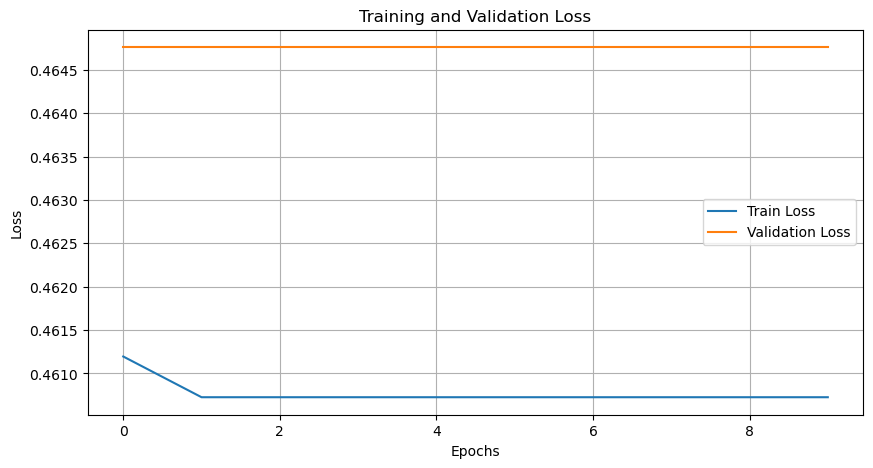

In [37]:
plot_training(epoch_train_errors_dice, epoch_val_errors_dice)

Accuracy: 0.6077
{'0': {'precision': 0.6077116238317757, 'recall': 1.0, 'f1-score': 0.7559958077349376, 'support': 83232184.0, 'dice': np.float64(0.7559958077349377)}, 'micro avg': {'precision': 0.6077116238317757, 'recall': 1.0, 'f1-score': 0.7559958077349376, 'support': 83232184.0}, 'macro avg': {'precision': 0.6077116238317757, 'recall': 1.0, 'f1-score': 0.7559958077349376, 'support': 83232184.0, 'dice': 0.7559958077349377}, 'weighted avg': {'precision': 0.6077116238317757, 'recall': 1.0, 'f1-score': 0.7559958077349376, 'support': 83232184.0, 'dice': 0.7559958077349367}}
Dice: 0.7560


Reporte de clasificación:

               precision     recall      f1-score      support       dice    
0                0.61          1.0         0.76      83232184.0      0.76    
micro avg        0.61          1.0         0.76      83232184.0              
macro avg        0.61          1.0         0.76      83232184.0      0.76    
weighted avg     0.61          1.0         0.76      83232184.0  

/Users/nataliacampigliastemphelet/miniconda3/envs/taller-dl/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


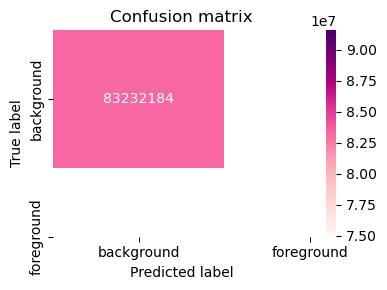

In [38]:
acc, rep, cm = model_segmentation_report(
    unet_dice, test_loader_pad, DEVICE, 1,
    do_confusion_matrix=True, show_dice_loss=True
)

## Misma arquitectura pero con imágenes de entrada en RGB

# Transforms elegidas

In [ ]:
"""RandomResizedCrop, RandomScale o RandomZoom
 

train_dual_tfms = T.Compose([
    T.ToImage(),                         
    T.ToDtype(torch.uint8, scale=False), # imagen todavía en 0..255
    T.RandomHorizontalFlip(p=0.5),

    # Escala y recorte: hace que la red vea personas chicas y grandes
    T.RandomResizedCrop(size=IMG_SIZE, scale=(0.5, 1.0), ratio=(0.9, 1.1), antialias=True),

    # Rotación moderada por posibles inclinaciones
    T.RandomRotation(degrees=10, interpolation=T.InterpolationMode.BILINEAR),

    # Jitter de color solo en la imagen (no en la máscara)
    T.SanitizeBoundingBoxes(),          # seguro si luego usás boxes; si no, omite
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.02),

    # Convertir a float y normalizar al final
    T.ToDtype(torch.float32, scale=True),     # imagen 0..1
    T.Normalize(mean=MEAN, std=STD),
])

val_dual_tfms = T.Compose([
    T.ToImage(),
    T.ToDtype(torch.uint8, scale=False),
    T.Resize(IMG_SIZE, antialias=True),
    T.ToDtype(torch.float32, scale=True),
    T.Normalize(mean=MEAN, std=STD),
])
"""
# Para la MÁSCARA:
# - usar las MISMAS transformaciones geométricas (flip, crop, resize, rotation)
# - SIEMPRE con interpolación NEAREST
#mask_geom_tfms = dict(interpolation=T.InterpolationMode.NEAREST)
